## Ex 1
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

Download the data <br>
Programatically download the data from the above link. <br>
Import the data into a Pandas dataframe. <br>
Show the head of the Pandas dataframe. <br> <br>
Feature engineering <br>
Reduce the dataset by: <br>
Make == Honda <br>
Fueltype == Gasoline <br>
Remove outliers.  <br>
Hint: df[column name'] < df['column name'].quantile(0.90) <br>
Only use 2 features: <br> 
'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'  <br>
Normalize data (reduce values to be between 0 and 1) <br> <br>
Linear regression <br>
Perform linear regression where x = horsepower and y = mpg <br>
What is the coefficient (slope) of your model? What does this number mean? <br>
According to your model, what is y when x=1. <br>
Show the regression line on a scatterplot with the other datapoints.

In [1]:
import pandas as pd
import urllib.request

# URL til biler dataset
url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

# Download dataset og gem det i en lokal fil
filename = 'cars.csv'
urllib.request.urlretrieve(url, filename)

# Importer data til Pandas DataFrame
df = pd.read_csv(filename)

# Vis hovedet af dataframen
print(df.columns)



Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')


In [2]:
# Vælg kun Honda-biler med Gasoline fueltype
df = df[(df['Identification.Make'] == 'Honda') & (df['Fuel Information.Fuel Type'] == 'Gasoline')]

# Fjern outliers
df = df[(df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)) &
        (df['Fuel Information.Highway mpg'] < df['Fuel Information.Highway mpg'].quantile(0.90))]

# Kun brug 2 features
df = df[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]

# Vis hovedet af dataframen
print(df.head())


     Fuel Information.Highway mpg  \
102                            31   
103                            31   
104                            31   
106                            31   
107                            31   

     Engine Information.Engine Statistics.Horsepower  
102                                              190  
103                                              190  
104                                              190  
106                                              190  
107                                              190  


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Skalér data mellem 0 og 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Vis de normaliserede data
print(df_scaled.head())

   Fuel Information.Highway mpg  \
0                      0.733333   
1                      0.733333   
2                      0.733333   
3                      0.733333   
4                      0.733333   

   Engine Information.Engine Statistics.Horsepower  
0                                         0.548872  
1                                         0.548872  
2                                         0.548872  
3                                         0.548872  
4                                         0.548872  


In [49]:
#Understående er ikke nødvendigt, men man kan søge at finde den bedste random state

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Definer x og y
X = df['Engine Information.Engine Statistics.Horsepower'].values.reshape(-1, 1)
y = df['Fuel Information.Highway mpg']

# Opdel data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Definer en liste af random_state-værdier at teste med
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialiser variabler til at holde styr på bedste random_state og R2 score
best_random_state = 0
best_score = 0

# Loop gennem random_state-værdierne og test modellen
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('Random state:', random_state, 'R2 score:', score)
    if score > best_score:
        best_score = score
        best_random_state = random_state

# Træn modellen med den bedste random_state-værdi og udskriv R2 score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print('Bedste random state:', best_random_state, 'Bedste R2 score:', score)


Random state: 10 R2 score: 0.4774136495745025
Random state: 20 R2 score: 0.5936699279257507
Random state: 30 R2 score: 0.5350559743499232
Random state: 40 R2 score: 0.5299167249079221
Random state: 50 R2 score: 0.6179174118593251
Random state: 60 R2 score: 0.47476050359616884
Random state: 70 R2 score: 0.6227650423073401
Random state: 80 R2 score: 0.41448974807526706
Random state: 90 R2 score: 0.6213668618052612
Random state: 100 R2 score: 0.6167302053854077
Bedste random state: 70 Bedste R2 score: 0.6227650423073401


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Definer x og y
X = df['Engine Information.Engine Statistics.Horsepower'].values.reshape(-1, 1)
y = df['Fuel Information.Highway mpg']

# Opdel data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

# Træn modellen
model = LinearRegression()
model.fit(X_train, y_train)

# Forudsige på test-sættet
y_pred = model.predict(X_test)

print('Koefficienten er:', model.coef_[0])
print('Da koefficient er <0 betyder det flere hestekræfter = kortere/gallon')

# Evaluere modellen
score = r2_score(y_test, y_pred)
print('R2 score:', score)

Koefficienten er: -0.07727082152802488
Da koefficient er <0 betyder det flere hestekræfter = kortere/gallon
R2 score: 0.6227650423073401


In [40]:
#Forudsig mpg med 1 horsepower
x_new = [[1]] 
predicted_y = model.predict(x_new)
print('Forventet y-værdi for x=1:', predicted_y[0])


Forventet y-værdi for x=1: 43.13841476748786


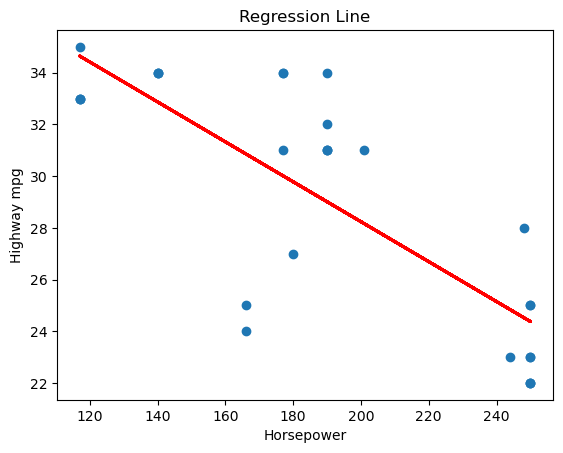

In [48]:
import matplotlib.pyplot as plt

# Plot scatterplot
plt.scatter(X_test, y_test)

# Forudsige y-værdier for x-værdier i test-sættet
y_pred = model.predict(X_test)

# Plot regression linje
plt.plot(X_test, y_pred, color='red', linewidth=2)

# Tilføj akser label og titel
plt.xlabel('Horsepower')
plt.ylabel('Highway mpg')
plt.title('Regression Line')

# Vis plot
plt.show()
